Q. 1. a. Preliminaries:

In [27]:
import pandas as pd

df = pd.read_csv('master.csv')
df['age'].replace({'5-14 years': '05-14 years'}, inplace=True)
df.rename(columns={' gdp_for_year ($) ': 'gdp_for_year ($)'}, inplace=True)
df.loc[:, 'gdp_for_year ($)'] = df.loc[:, 'gdp_for_year ($)'].apply(lambda x : int(x.replace(',', '')))
# Read the data file into a data frame.
# Some preliminary changes for convenience.

In [28]:
print(df.sample(n=10).to_string())
# Display a portion of the data to get a feel for the dataset.

                 country  year     sex          age  suicides_no  population  suicides/100k pop           country-year  HDI for year  gdp_for_year ($)  gdp_per_capita ($)    generation
11339             Guyana  2011    male  05-14 years            3       84995               3.53             Guyana2011         0.630        2576024116                3815  Generation Z
1729           Australia  2011    male  55-74 years          366     2104816              17.39          Australia2011         0.930     1394280784778               66770       Boomers
5121              Canada  2002    male    75+ years          164      691551              23.71             Canada2002           NaN      757950678647               25570        Silent
13671              Japan  2010  female  35-54 years         2404    16781836              14.33              Japan2010         0.884     5700098114744               47059  Generation X
22279         Seychelles  2005    male    75+ years            0         94

In [29]:
print(df.shape[0])
# Print the number of records.

27820


In [30]:
print(df.shape[1])
# Print the number of variables.

12


In [31]:
print(df.dtypes)
# Print the datatype of each variable.

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
dtype: object


In [32]:
print(df.nunique())
# For each variable, print the number of unique values.

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
gdp_for_year ($)       2321
gdp_per_capita ($)     2233
generation                6
dtype: int64


In [33]:
actual_type = {
    'country': 'Nominal',
    'year': 'Temporal',
    'sex': 'Categorical',
    'suicides_no': 'Integer',
    'population': 'Integer',
    'suicides/100k pop': 'Continuous',
    'country-year': 'Nominal',
    'HDI for year': 'Continuous',
    'gdp_for_year ($)': 'Continuous',
    'gdp_per_capita ($)': 'Continuous',
    'generation': 'Categorical'
}
print(pd.Series(actual_type))
# Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not nominal or ordinal), and continuous variables.

country                   Nominal
year                     Temporal
sex                   Categorical
suicides_no               Integer
population                Integer
suicides/100k pop      Continuous
country-year              Nominal
HDI for year           Continuous
gdp_for_year ($)       Continuous
gdp_per_capita ($)     Continuous
generation            Categorical
dtype: object


In [34]:
print(df.isnull().sum())
# For each variable, display the number of missing entries.

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [35]:
print(df.dropna().shape[0])
# Find the number of records with no missing entries.

8364


Q. 1. b. Discrete variables:

In [36]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
# import statements required for plot and entropy

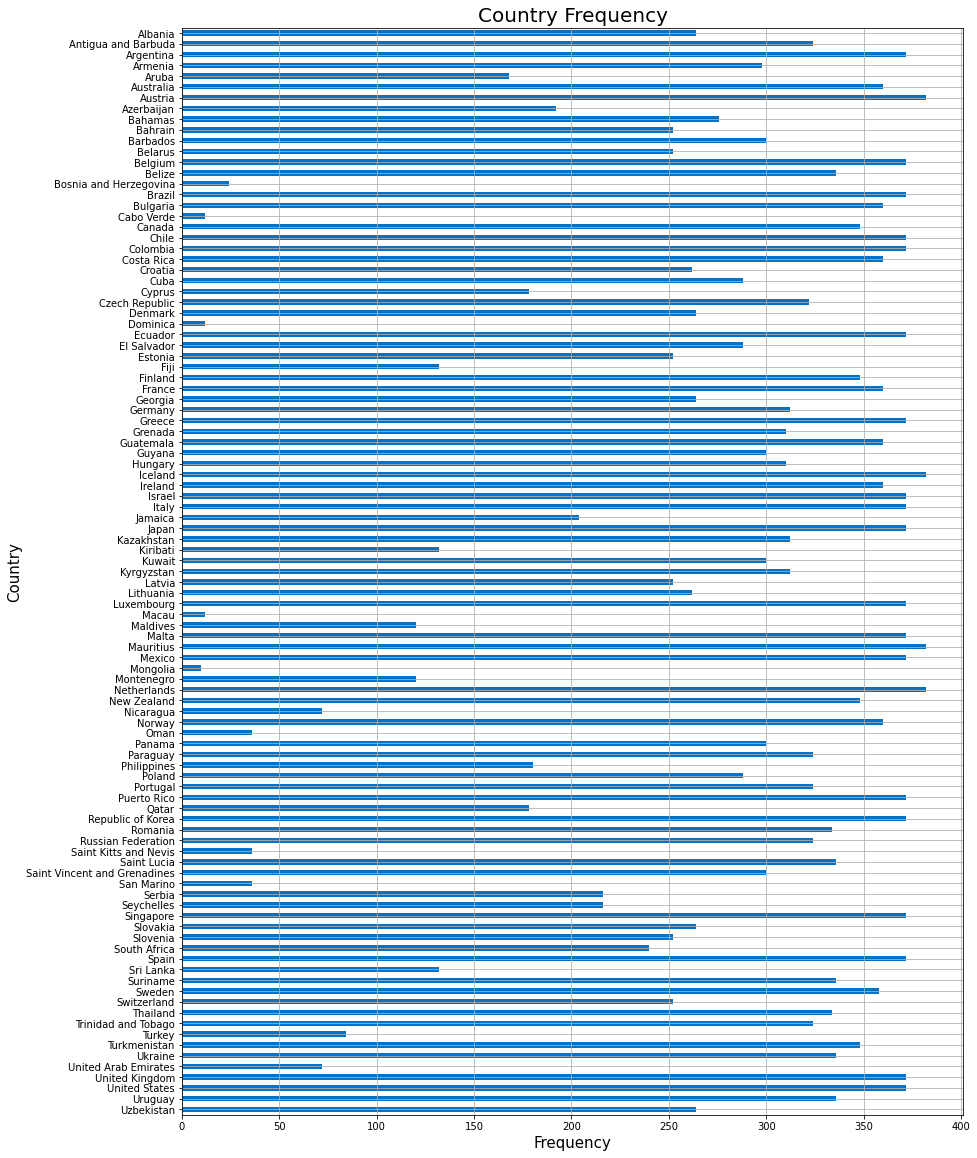


Mode(s) =  ['Austria', 'Iceland', 'Mauritius', 'Netherlands']
Entropy =  4.512115046503916


In [37]:
fig, ax = plt.subplots(figsize=(14, 20))
freq = df['country'].value_counts().sort_index(ascending=False)
freq.plot.barh(ax=ax, color='#0072c9')
ax.set_xlabel('Frequency', fontsize=15)
ax.set_ylabel('Country', fontsize=15)
ax.set_title("Country Frequency", fontsize=20)
ax.grid()
plt.show()
print('\nMode(s) = ', df['country'].mode().tolist())
print('Entropy = ', entropy(freq))
# Frequency plot, mode and entropy for variable 'country'

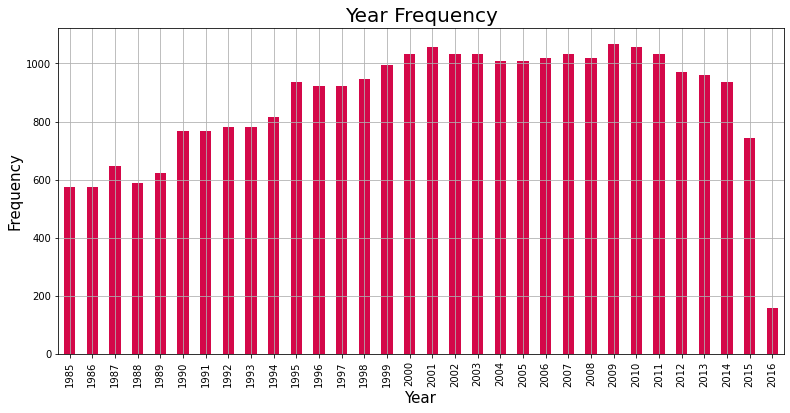


Mode(s) =  [2009]
Entropy =  3.4329561237563206


In [38]:
fig, ax = plt.subplots(figsize=(13, 6))
freq = df['year'].value_counts().sort_index(ascending=True)
freq.plot.bar(ax=ax, color='#d40849')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title("Year Frequency", fontsize=20)
ax.grid()
plt.show()
print('\nMode(s) = ', df['year'].mode().tolist())
print('Entropy = ', entropy(freq))
# Frequency plot, mode and entropy for variable 'year'

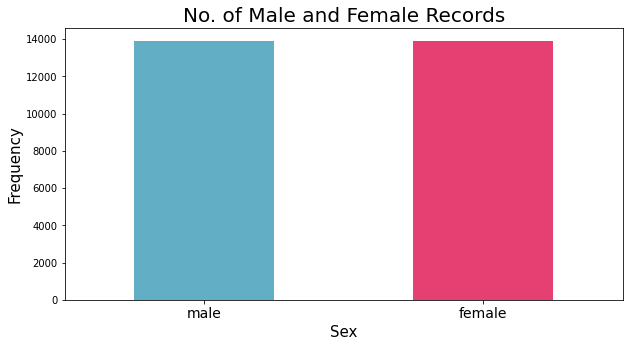


Mode(s) =  ['female', 'male']
Entropy =  0.6931471805599453


In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
freq = df['sex'].value_counts().sort_index(ascending=False)
freq.plot.bar(ax=ax, color=['#62aec5', '#e64072'])
ax.set_xlabel('Sex', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title("No. of Male and Female Records", fontsize=20)
ax.tick_params(axis='x', labelsize=14, labelrotation=0)
plt.show()
print('\nMode(s) = ', df['sex'].mode().tolist())
print('Entropy = ', entropy(freq))
# Frequency plot, mode and entropy for variable 'sex'

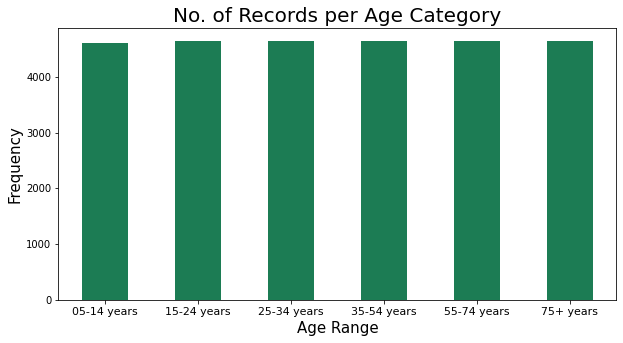


Mode(s) =  ['15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
Entropy =  1.7917561564428144


In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
freq = df['age'].value_counts().sort_index(ascending=True)
freq.plot.bar(ax=ax, color='#1C7C54')
ax.set_xlabel('Age Range', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title("No. of Records per Age Category", fontsize=20)
ax.tick_params(axis='x', labelsize=11, labelrotation=0)
plt.show()
print('\nMode(s) = ', df['age'].mode().tolist())
print('Entropy = ', entropy(freq))
# Frequency plot, mode and entropy for variable 'age'

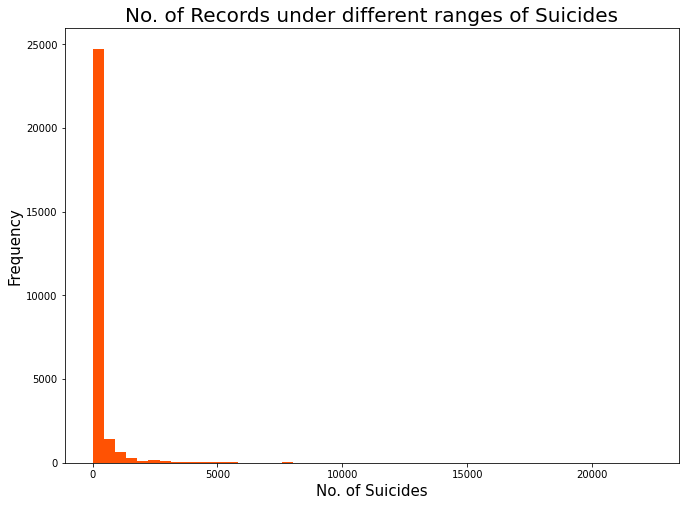


Mode(s) =  [0]
Entropy =  5.243743260094841


In [41]:
fig, ax = plt.subplots(figsize=(11, 8))
df['suicides_no'].plot.hist(ax=ax, bins=50, color='#ff5203')
ax.set_xlabel('No. of Suicides', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title("No. of Records under different ranges of Suicides", fontsize=20)

plt.show()
print('\nMode(s) = ', df['suicides_no'].mode().tolist())
print('Entropy = ', entropy(df['suicides_no'].value_counts()))
# Histogram plot, mode and entropy for variable 'suicides_no'

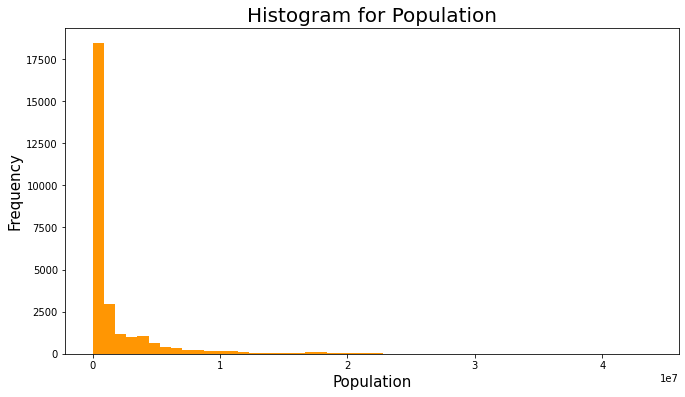


Mode(s) =  [24000]
Entropy =  10.096255386246106


In [42]:
fig, ax = plt.subplots(figsize=(11, 6))
df['population'].plot.hist(ax=ax, bins=50, color='#ff9603')
ax.set_xlabel('Population', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title("Histogram for Population", fontsize=20)

plt.show()
print('\nMode(s) = ', df['population'].mode().tolist())
print('Entropy = ', entropy(df['population'].value_counts()))
# Histogram plot, mode and entropy for variable 'population'

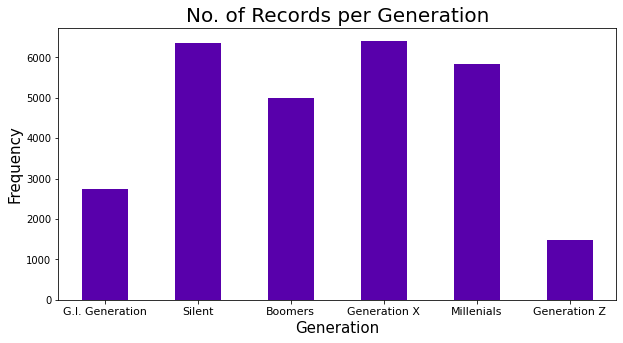


Mode(s) =  ['Generation X']
Entropy =  1.695449187635522


In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
freq = df['generation'].value_counts()[['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']]
freq.plot.bar(ax=ax, color='#5800ab')
ax.set_xlabel('Generation', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title("No. of Records per Generation", fontsize=20)
ax.tick_params(axis='x', labelsize=11, labelrotation=0)
plt.show()
print('\nMode(s) = ', df['generation'].mode().tolist())
print('Entropy = ', entropy(freq))
# Frequency plot, mode and entropy for variable 'generation'

Q. 1. c. Continuous variables:

In [44]:
from scipy.stats import probplot

contVar = ['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_for_year ($)', 'gdp_per_capita ($)']
cont = df[contVar]
# Filtering df to get continuous types of data
# Note: 'suicides_no' and 'population' are discrete but the sets of their values are countably infinite sets, hence they are under continuous.

In [45]:
stats = pd.concat([cont.mean(), cont.var(), cont.skew(), cont.min(), cont.max(), cont.median(), cont.quantile(0.25), cont.quantile(0.75)], 
                   axis=1, 
                   keys=['Mean', 'Variance', 'Skew', 'Min', 'Max', 'Median', '25th percentile', '75th percentile']
                  )
stats['Inter-quartile range'] = stats['75th percentile'] - stats['25th percentile']
stats = stats.transpose()
print(stats.to_string())

# For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75th percentile, and inter-quartile range.

                        suicides_no    population  suicides/100k pop  HDI for year  gdp_for_year ($)  gdp_per_capita ($)
Mean                     242.574407  1.844794e+06          12.816097      0.776601      4.455810e+11        1.686646e+04
Variance              813690.444264  1.530202e+13         359.538900      0.008717      2.112982e+24        3.567405e+08
Skew                      10.352910  4.459414e+00           2.963414     -0.300877      7.233755e+00        1.963470e+00
Min                        0.000000  2.780000e+02           0.000000      0.483000      4.691962e+07        2.510000e+02
Max                    22338.000000  4.380521e+07         224.970000      0.944000      1.812071e+13        1.263520e+05
Median                    25.000000  4.301500e+05           5.990000      0.779000      4.811469e+10        9.372000e+03
25th percentile            3.000000  9.749850e+04           0.920000      0.713000      8.985353e+09        3.447000e+03
75th percentile          131.000

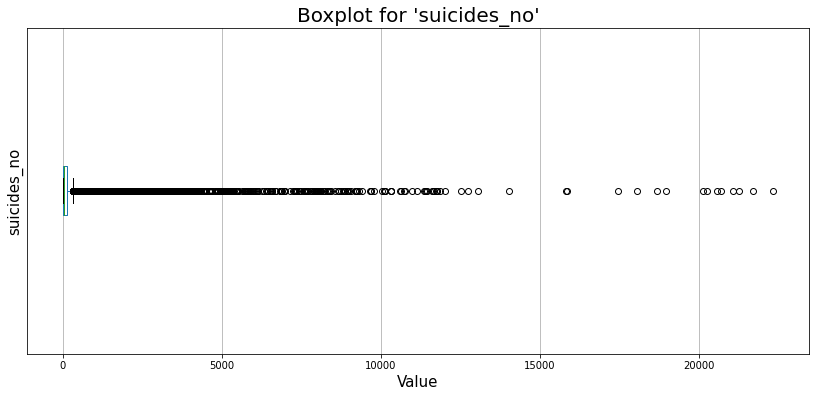

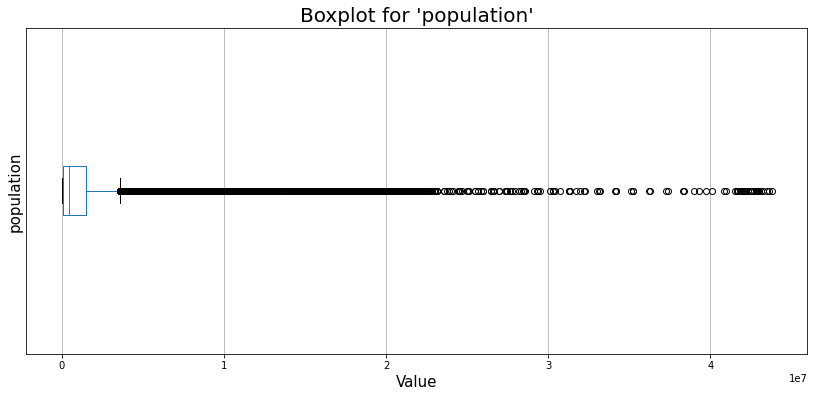

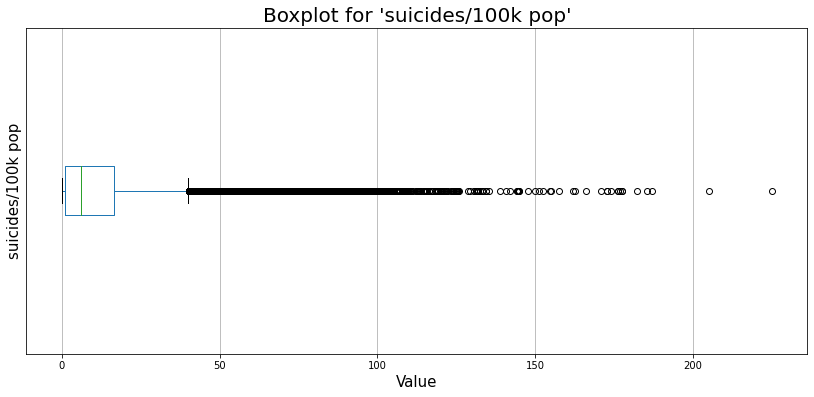

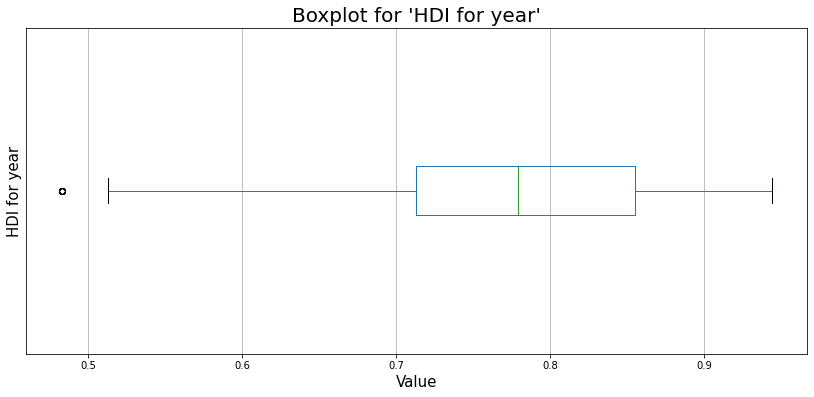

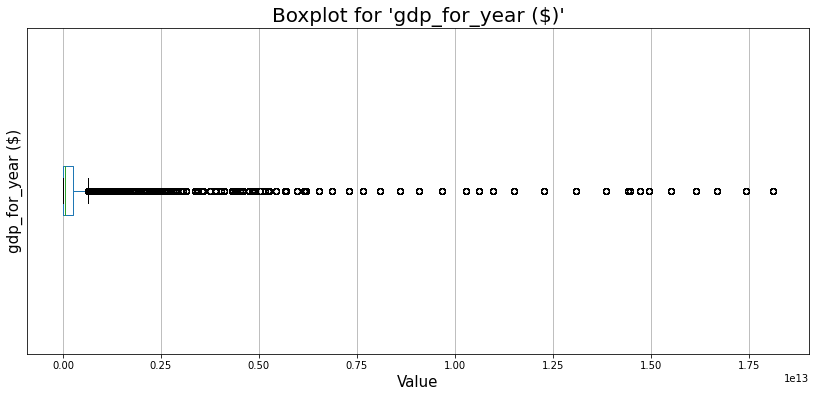

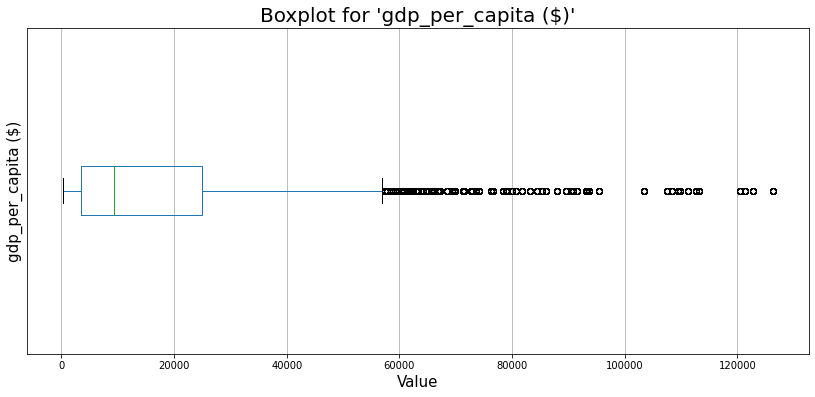

In [46]:
for i in contVar:
  fig, ax = plt.subplots(figsize=(14, 6))
  cont.boxplot(column=i, ax=ax, vert=False)
  ax.set_xlabel('Value', fontsize=15)
  ax.set_ylabel(i, fontsize=15)
  ax.set_title('Boxplot for \'{}\''.format(i), fontsize=20)
  ax.set_yticks([])
  plt.show()
  print()

# For each variable, plot box-and-whiskers plots.

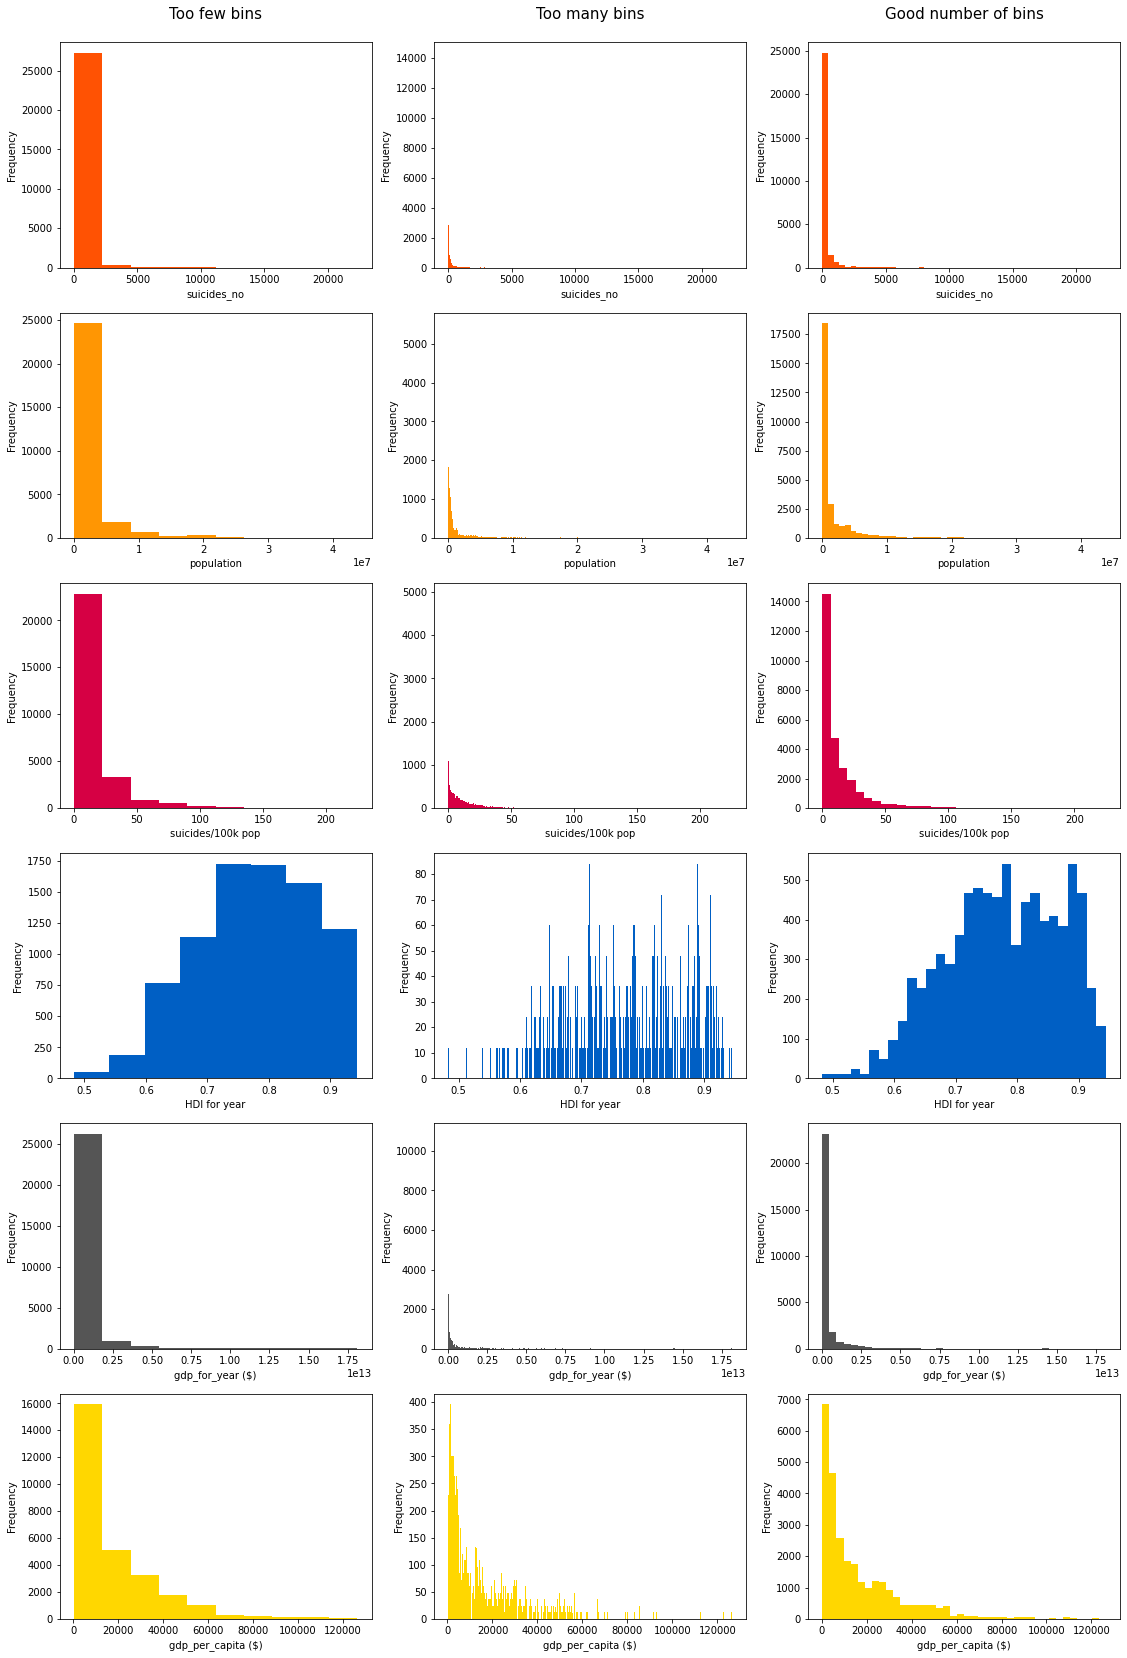

In [47]:
fig, ax = plt.subplots(6, 3, figsize=(19, 29))
ax[0, 0].set_title('Too few bins\n', fontsize=15)
ax[0, 1].set_title('Too many bins\n', fontsize=15)
ax[0, 2].set_title('Good number of bins\n', fontsize=15)

hist_params = pd.DataFrame({
    'suicides_no': [10, 800, 50, '#ff5203'], 
    'population': [10, 800, 50, '#ff9603'], 
    'suicides/100k pop': [10, 800, 34, '#d60044'], 
    'HDI for year': [8, 500, 30, '#005fc4'], 
    'gdp_for_year ($)': [10, 800, 40, '#555555'], 
    'gdp_per_capita ($)': [10, 1000, 40, '#ffd700'], 
  }, 
  index=['Too few bins', 'Too many bins', 'Good number of bins', 'Color']
)

for i in range(6):
  for j in range(3):
    cont.iloc[:, i].plot.hist(ax=ax[i, j], bins=hist_params.iloc[j, i], color=hist_params.iloc[3, i])
    ax[i, j].set_xlabel(hist_params.columns[i])
plt.show()

# For each variable, plot the histogram three times: with too few bins, too many bins, good number of bins.

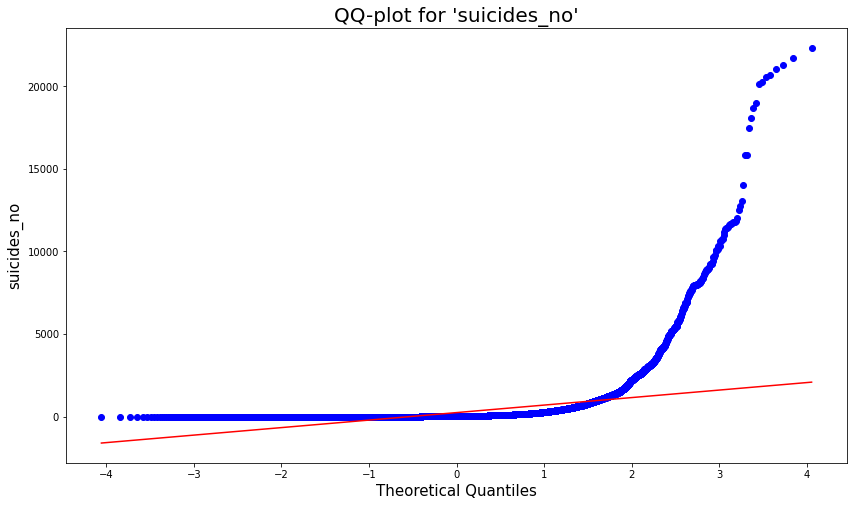

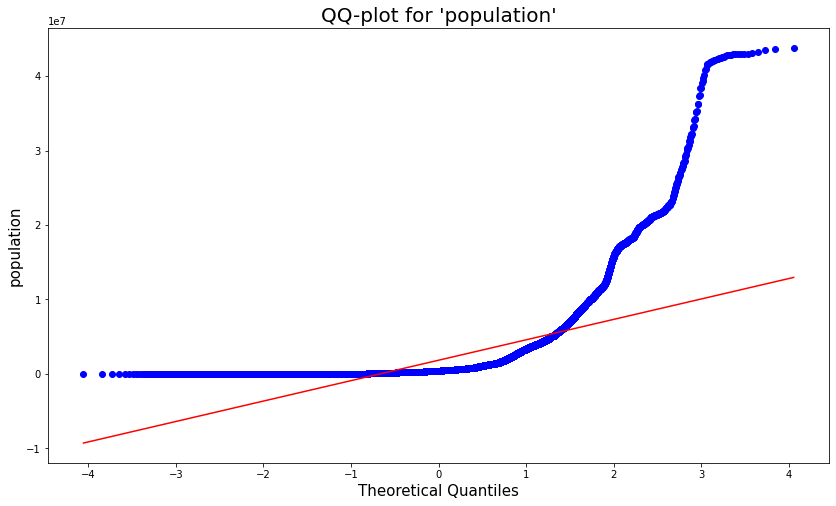

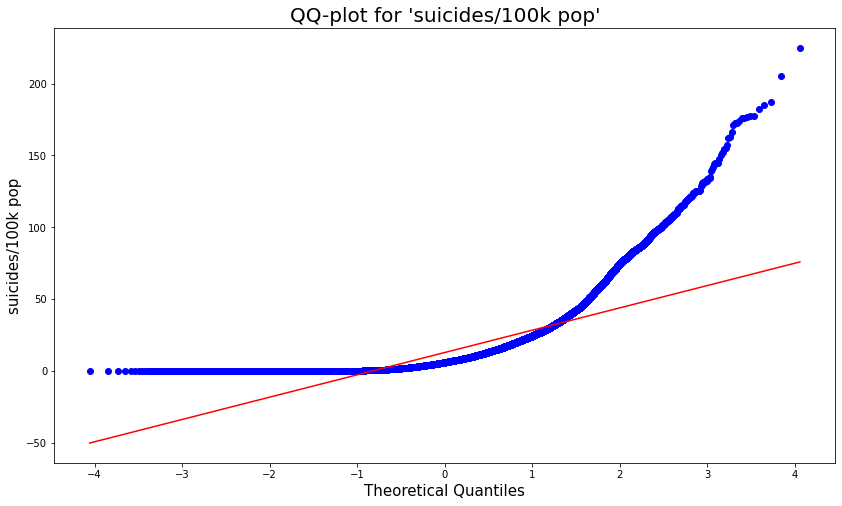

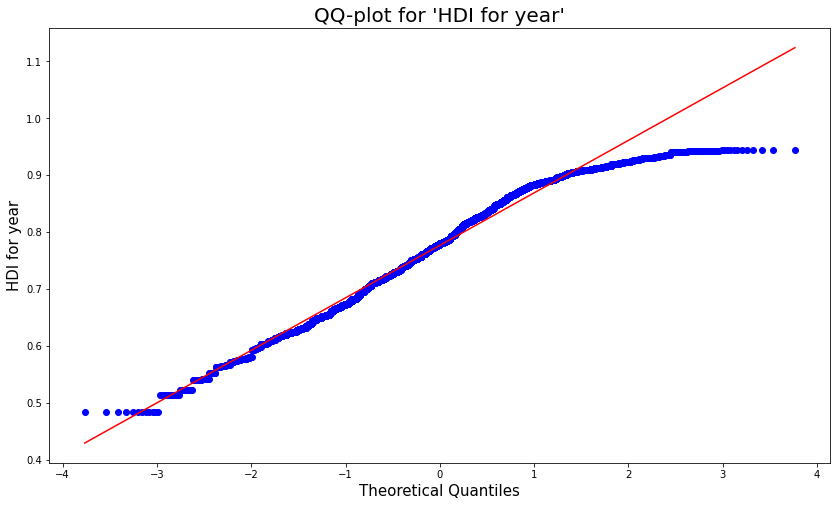

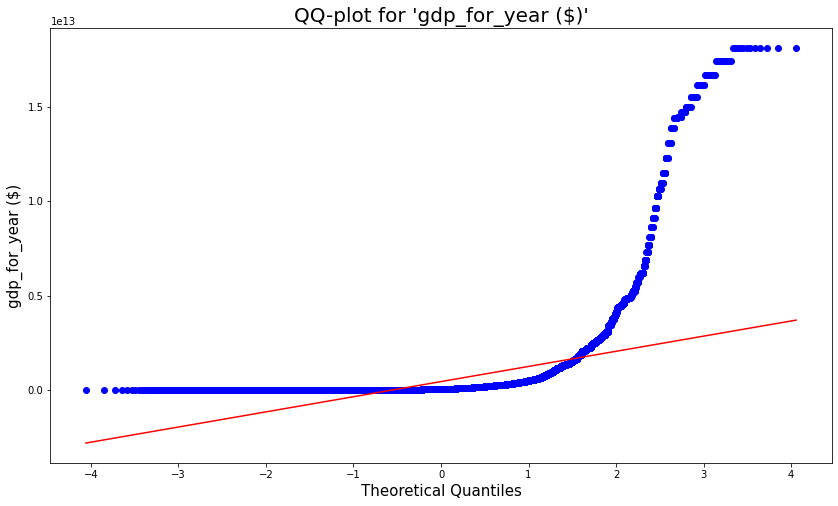

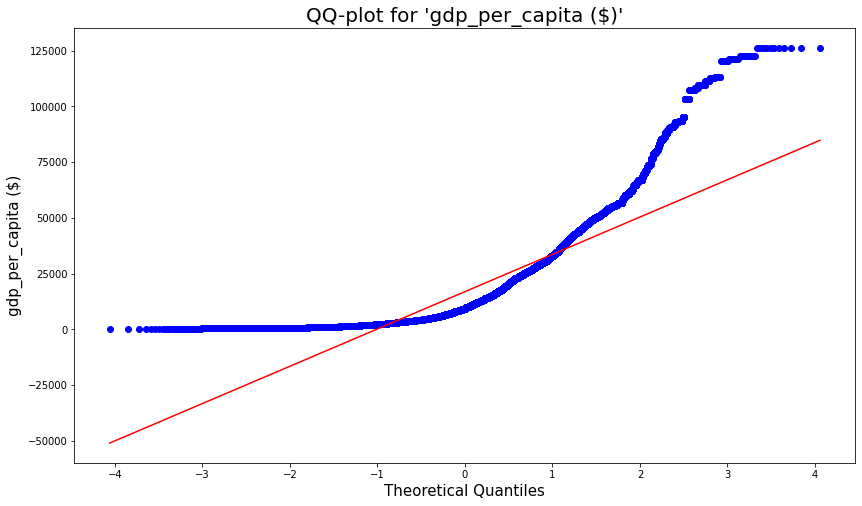

In [48]:
for i in contVar:
  fig, ax = plt.subplots(figsize=(14, 8))
  probplot(cont[i].dropna(), dist="norm", plot=ax)
  ax.set_title('QQ-plot for \'{}\''.format(i), fontsize=20)
  ax.set_xlabel('Theoretical Quantiles', fontsize=15)
  ax.set_ylabel(i, fontsize=15)
  plt.show()
  print()

# For each variable, use QQ-plot to see the extent to which the variable deviates from normal distribution, and how (left-skew, right-skew, or more like uniform distribution)

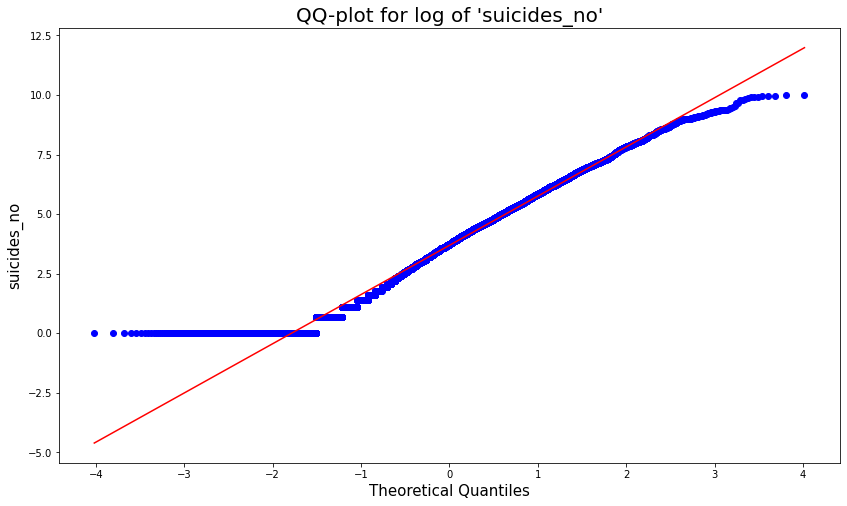

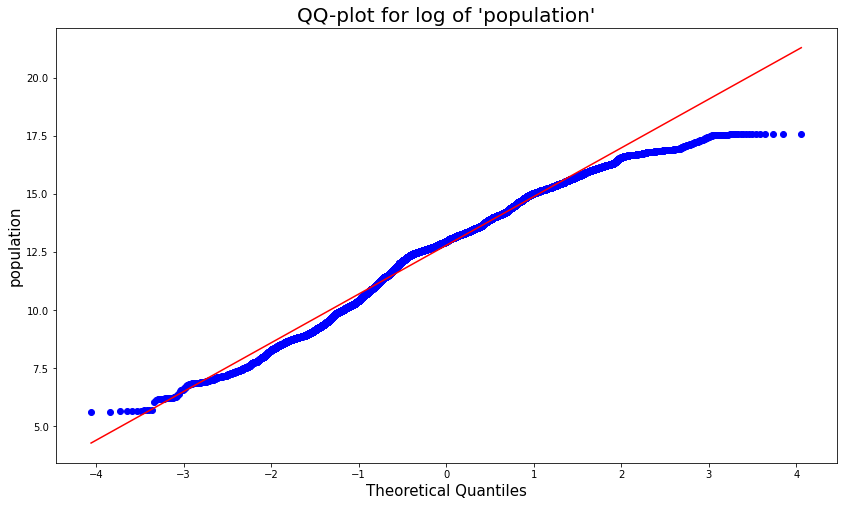

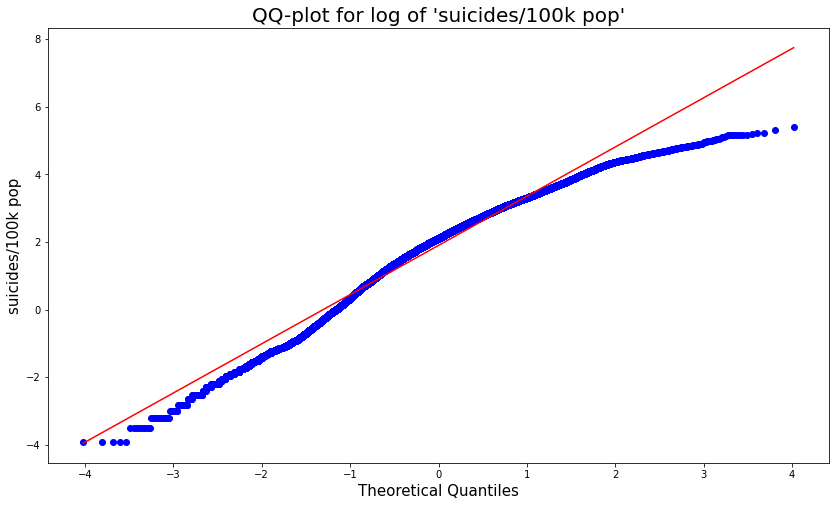

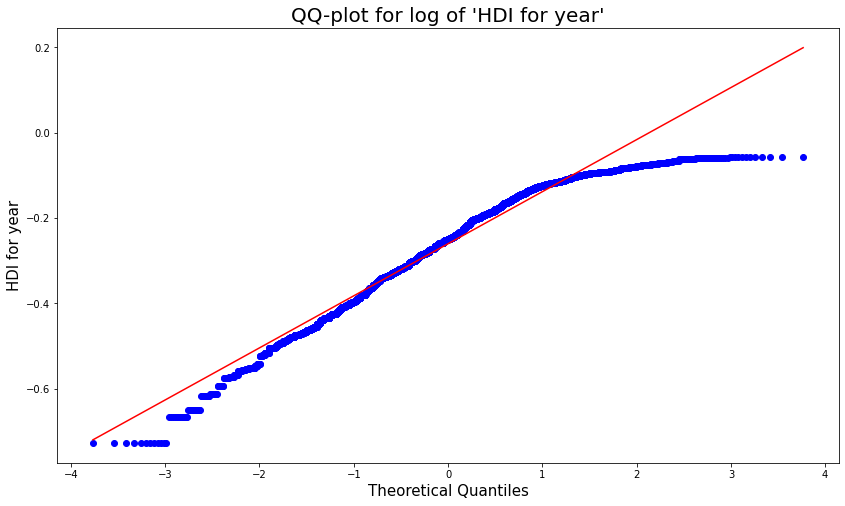

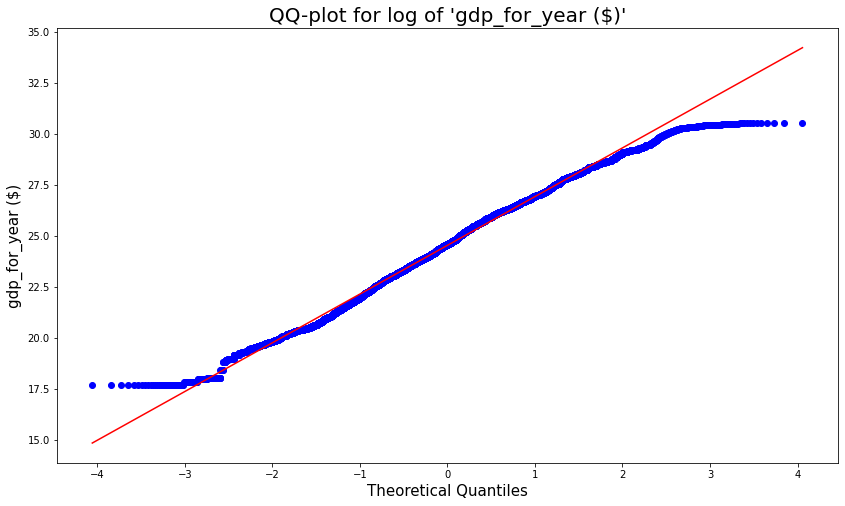

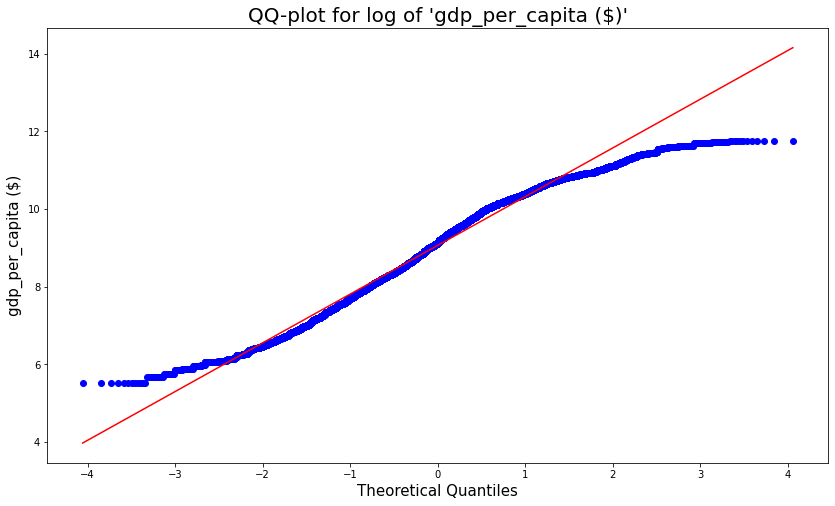


For variables, 'suicides_no', 'population', 'suicides/100k pop', 'gdp_for_year ($)' and 'gdp_per_capita ($)', the graph better coincides for log-normal case.


In [49]:
from math import log
import numpy as np

logCont = cont.applymap(lambda x : np.nan if x <= 0 else log(x))

for i in contVar:
  fig, ax = plt.subplots(figsize=(14, 8))
  probplot(logCont[i].dropna(), dist="norm", plot=ax)
  ax.set_title('QQ-plot for log of \'{}\''.format(i), fontsize=20)
  ax.set_xlabel('Theoretical Quantiles', fontsize=15)
  ax.set_ylabel(i, fontsize=15)
  plt.show()
  print()

print('For variables, \'suicides_no\', \'population\', \'suicides/100k pop\', \'gdp_for_year ($)\' and \'gdp_per_capita ($)\', the graph better coincides for log-normal case.')

# For each variable, check if the variable deviatesis log-normal.

Q. 1. d. Pair-wise interaction:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


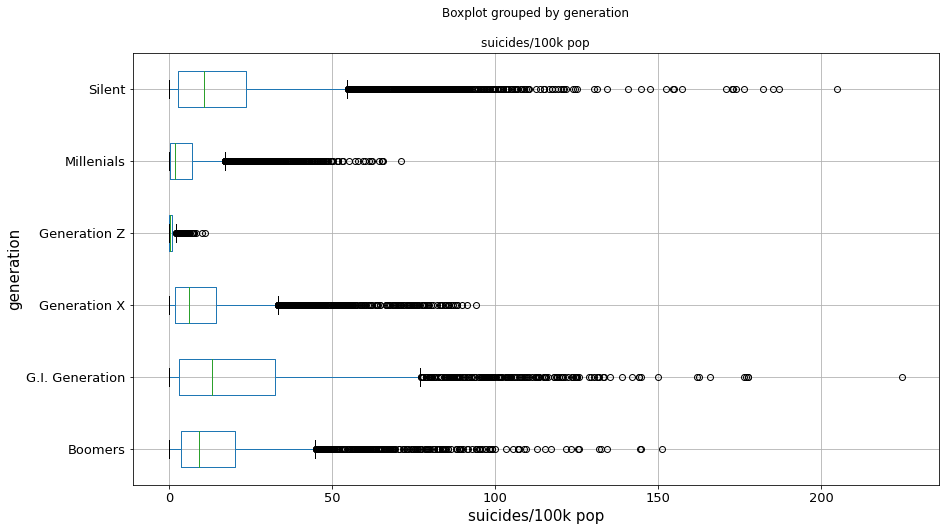

In [50]:
fig, ax = plt.subplots(figsize=(14, 8))
df.boxplot(by='generation', column='suicides/100k pop', ax=ax, vert=False)
ax.set_xlabel('suicides/100k pop', fontsize=15)
ax.set_ylabel('generation', fontsize=15)
ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13)
plt.show()
# Pick a two discrete-continuous pairs, and plot box-and-whiskers plot for the continuous variable side-by-side for each value of the discrete variable.

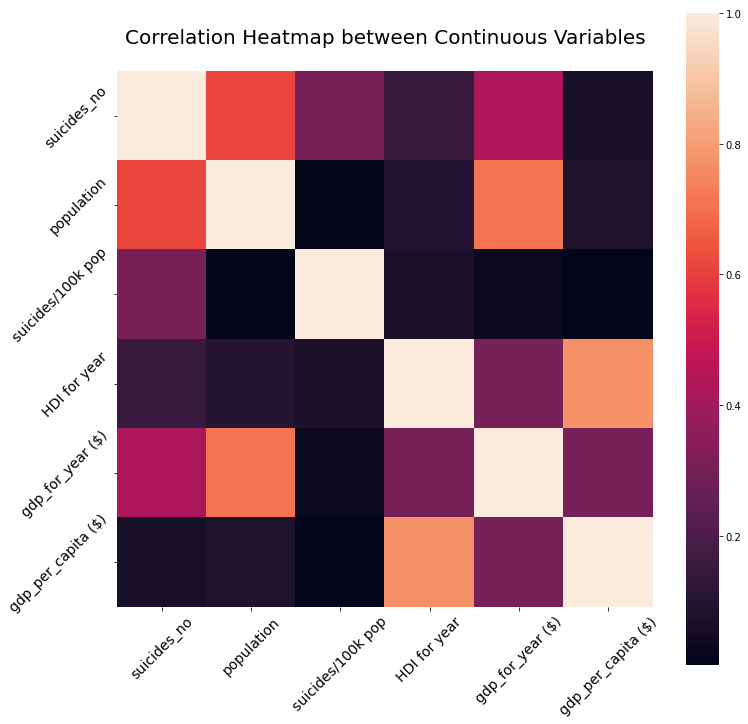

In [51]:
import seaborn as sns
corr = cont.corr()
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr, square=True)
ax.set_title('\nCorrelation Heatmap between Continuous Variables\n', fontsize=20)
ax.tick_params(axis='x', labelsize=14, labelrotation=45)
ax.tick_params(axis='y', labelsize=14, labelrotation=45)
# Plot a heatmap of correlation between all pairs of continuous variables.

m =  0.07017411543152788
c =  0.1209165786846563


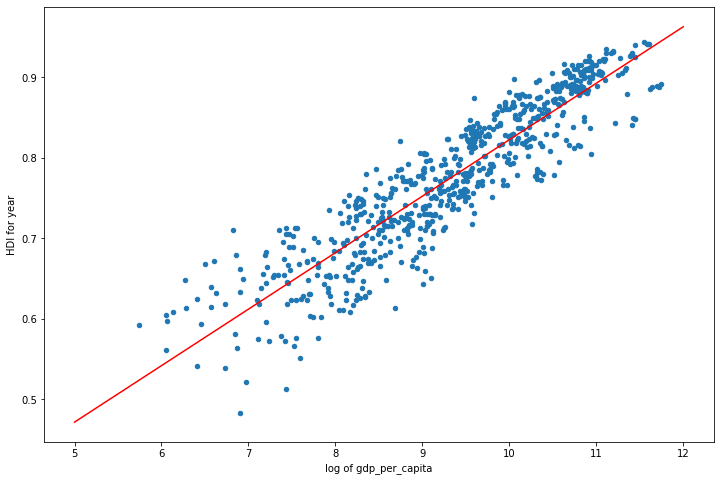

In [52]:
import numpy as np
from math import log

sui_hdi_pop_gdp = df[['country', 'year', 'suicides_no', 'population', 'HDI for year', 'gdp_per_capita ($)']].groupby(['country', 'year', 'HDI for year', 'gdp_per_capita ($)'], as_index=False).sum()
sui_hdi_pop_gdp['suicides_no'] *= 100000 / sui_hdi_pop_gdp['population']
sui_hdi_pop_gdp = sui_hdi_pop_gdp.rename(columns={'suicides_no': 'suicides/100k pop'})
sui_hdi_pop_gdp['gdp_per_capita ($)'] = sui_hdi_pop_gdp['gdp_per_capita ($)'].apply(lambda x: log(x))

fig, ax = plt.subplots(figsize=(12, 8))
sui_hdi_pop_gdp.plot.scatter(x='gdp_per_capita ($)', y='HDI for year', ax=ax)
m, c = np.polyfit(sui_hdi_pop_gdp['gdp_per_capita ($)'], sui_hdi_pop_gdp['HDI for year'], deg=1)
plt.plot(np.linspace(5, 12, 100), m*np.linspace(5, 12, 100)+c, color='#FF0000')
plt.xlabel('log of gdp_per_capita')

print('m = ', m)
print('c = ', c)
plt.show()
# Creative part: Read up on EDA from sources such as 
# https://bolt.mph.ufl.edu/6050-6052/unit-1/role-type-classification/
# and https://www.itl.nist.gov/div898/handbook/eda/eda.htm,
# and perform one more EDA of your choice and share the insight.

# Simple Linear Regression
# HDI for year varies linearly(with some error) with log of gdp_per_capita

Q. 2.

               country  avg_yearly_suicides
75  Russian Federation         44805.259259
98       United States         33355.258065
46               Japan         26029.096774
95             Ukraine         11426.785714
35             Germany         11202.384615
33              France         10970.900000



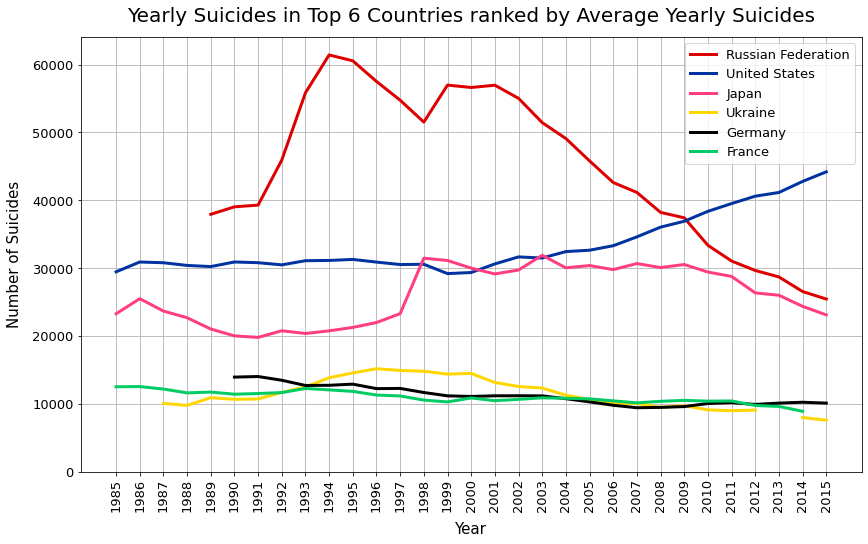

In [53]:
country_year_suicide = df[['country', 'year', 'suicides_no']].groupby(['country', 'year'], as_index=False).sum()
top6 = country_year_suicide[['country', 'suicides_no']].groupby('country', as_index=False).mean().sort_values(by='suicides_no', ascending=False).head(6)
top6.rename(columns={'suicides_no': 'avg_yearly_suicides'}, inplace=True)
print(top6, end='\n\n')
cys_top6 = country_year_suicide[country_year_suicide['country'].isin(top6['country'])].pivot(index='year', columns='country')['suicides_no'][top6['country']]

fig, ax = plt.subplots(figsize=(14, 8))
cys_top6.plot.line(ax=ax, color=['#DE0000', '#0033A0', '#ff3d81', '#ffd600', '#000000', '#00cc63'], lw=3)
ax.set_xticks(cys_top6.index)
ax.set_ylim(ymin=0)
ax.tick_params(axis='x', labelsize=13, labelrotation=90)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize=13)
ax.grid()
ax.set_xlabel('Year', fontsize=15, labelpad=10)
ax.set_ylabel('Number of Suicides', fontsize=15, labelpad=10)
ax.set_title('Yearly Suicides in Top 6 Countries ranked by Average Yearly Suicides', fontsize=20, pad=15)
plt.show()

# Pick the top six countries by average yearly suicides, and display their suicide for each year separately.

country      Russian Federation  United States   Japan  Ukraine  Germany  France
age                                                                             
05-14 years                8840           8923    2130     1949      832     877
15-24 years              148611         141679   52288    27509    17902   19849
25-34 years              231187         182047   94529    49633    32947   42510
35-54 years              479140         380917  278679   124721    97833  123510
55-74 years              267753         224770  272705    90385    89191   86509
75+ years                 74211          95677  106571    25753    52557   55872


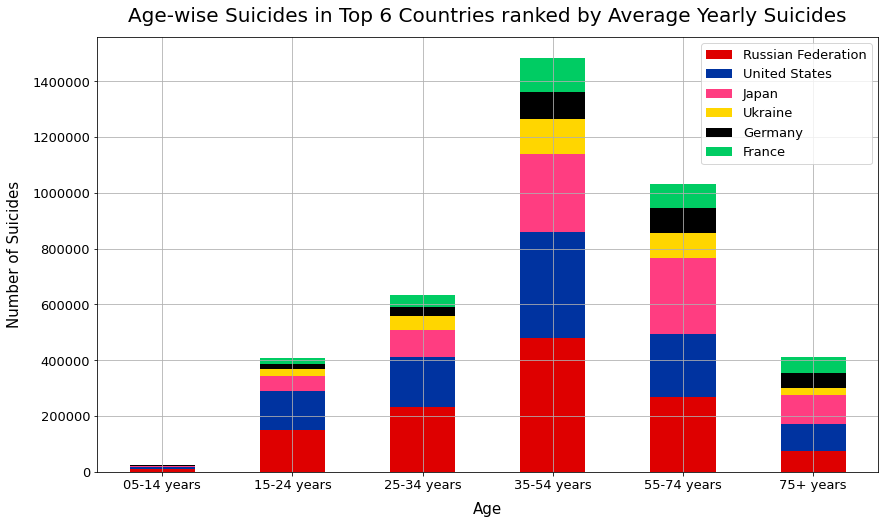

In [54]:
what = 'suicides_no'
country_age_what = df[['country', 'age', what]].groupby(['country', 'age'], as_index=False).sum()
caw_top6 = country_age_what[country_age_what['country'].isin(top6['country'])].pivot(index='age', columns='country')[what][top6['country']]
print(caw_top6.to_string())

fig, ax = plt.subplots(figsize=(14, 8))
caw_top6.plot.bar(stacked=True, ax=ax, color=['#DE0000', '#0033A0', '#ff3d81', '#ffd600', '#000000', '#00cc63'])
ax.tick_params(axis='x', labelsize=13, labelrotation=0)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize=13)
ax.grid()
ax.set_xlabel('Age', fontsize=15, labelpad=10)
ax.set_ylabel('Number of Suicides', fontsize=15, labelpad=10)
ax.set_title('Age-wise Suicides in Top 6 Countries ranked by Average Yearly Suicides', fontsize=20, pad=15)
ax.ticklabel_format(axis='y', style='plain')
plt.show()

# For the same six countries compare the mix of age groups. What does the plot tell you about the differences or similarities by country?
# Similarities: No. of suicides vs age plot shows similar trends...increases upto 35-54 years, maximizes there and then decreases.
# Differences: For a some age categories ranking of these 6 countries changes slightly.

     suicides/100k pop           
sex             female       male
year                             
1985          6.331028  16.865655
1986          6.454567  17.176590
1987          6.260196  17.138508
1988          6.127736  17.079080
1989          6.569136  19.950556
1990          6.648162  20.097014
1991          6.479691  20.491858
1992          6.401607  20.929905
1993          6.535707  22.849484
1994          6.483441  23.945502
1995          6.670028  24.410808
1996          6.400868  23.735183
1997          6.203806  22.469947
1998          6.292064  23.062036
1999          6.174540  23.085443
2000          5.995776  22.853226
2001          5.891565  23.090540
2002          5.951725  22.563002
2003          5.905345  22.359875
2004          5.948144  22.065901
2005          5.855634  21.546104
2006          5.525729  20.165920
2007          5.608230  19.816726
2008          5.676551  19.946261
2009          5.448523  19.475055
2010          5.324264  18.845585
2011          

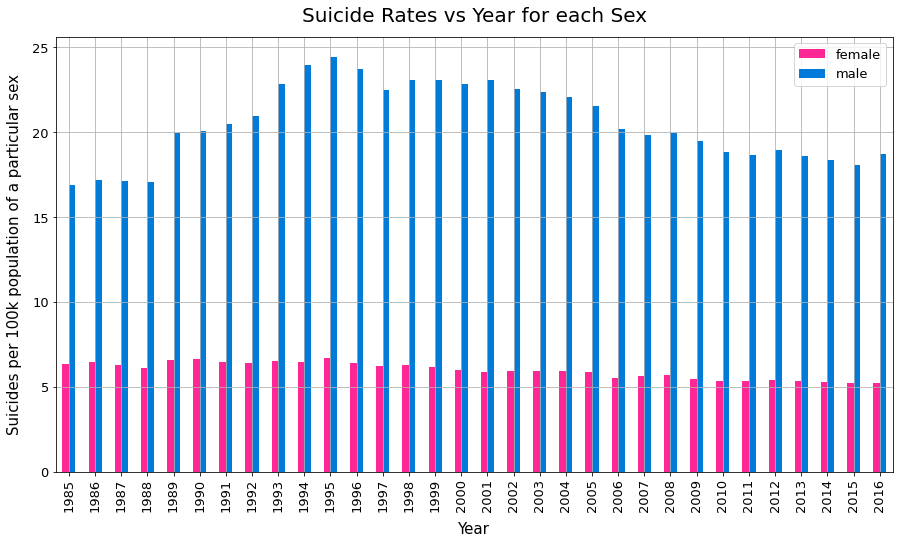

In [55]:
part_c = df[['year', 'sex', 'suicides_no', 'population']].groupby(['year', 'sex'], as_index=False).sum()
part_c['suicides_no'] *= 100000 / part_c['population']
part_c = part_c.drop(columns='population').rename(columns={'suicides_no': 'suicides/100k pop'}).pivot(index='year', columns='sex')
print(part_c.to_string())

fig, ax = plt.subplots(figsize=(15, 8))
part_c['suicides/100k pop'].plot.bar(ax=ax, color=['#ff2696', '#007bd9'])
ax.tick_params(axis='x', labelsize=13, labelrotation=90)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize=13)
ax.grid()
ax.set_xlabel('Year', fontsize=15, labelpad=10)
ax.set_ylabel('Suicides per 100k population of a particular sex', fontsize=15, labelpad=10)
ax.set_title('Suicide Rates vs Year for each Sex', fontsize=20, pad=15)
plt.show()

# Plot an appropriate set of graphs or charts that highlight the consistency of difference between males and females when it comes to suicide rates.

generation  G.I. Generation     Silent    Boomers  Generation X  Millenials  Generation Z
year                                                                                     
1985              18.700609  15.009567  15.171199      7.348178         NaN           NaN
1986              19.565006  15.655924  15.685770      7.374834         NaN           NaN
1987              19.504763  15.350550  15.364193      7.147988         NaN           NaN
1988              18.715635  14.701824  15.363480      7.178049         NaN           NaN
1989              18.201529  14.614245  14.976617      7.129404         NaN           NaN
1990              18.732935  15.098053  15.175843      7.118440         NaN           NaN
1991              23.630696  16.100293  15.074753     13.052556    0.740782           NaN
1992              22.598952  15.596992  14.757650     12.983205    0.861419           NaN
1993              22.414196  15.421403  14.952819     13.458453    0.866390           NaN
1994      

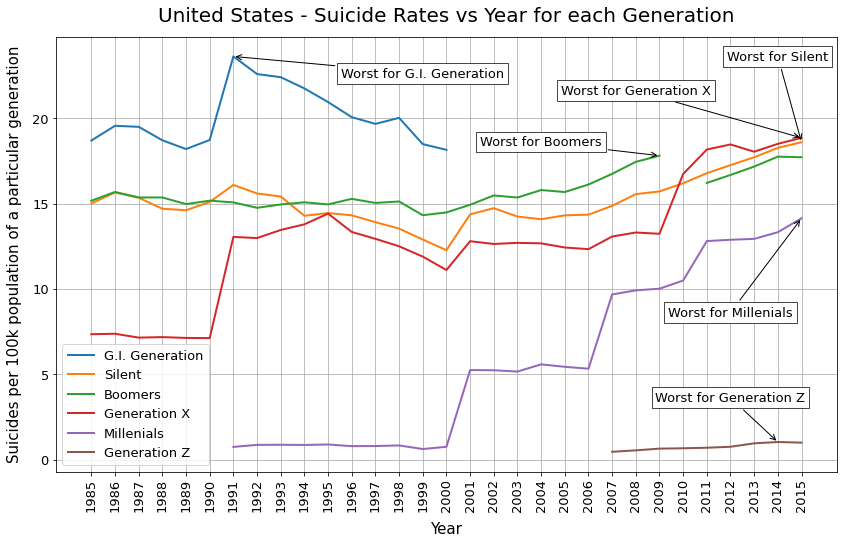

In [56]:
us = df[df['country'] == 'United States'][['year', 'generation', 'suicides_no', 'population']].groupby(['generation', 'year'], as_index=False).sum()
us['suicides_no'] *= 100000 / us['population']
us = us.drop(columns='population').rename(columns={'suicides_no': 'suicides/100k pop'}).pivot(index='year', columns='generation')
us = us['suicides/100k pop'][['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']]
print(us.to_string())

fig, ax = plt.subplots(figsize=(14, 8))
us.plot.line(ax=ax, lw=2)
ax.set_xticks(us.index)
ax.tick_params(axis='x', labelsize=13, labelrotation=90)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize=13)
ax.grid()
ax.set_xlabel('Year', fontsize=15, labelpad=10)
ax.set_ylabel('Suicides per 100k population of a particular generation', fontsize=15, labelpad=10)
ax.set_title('United States - Suicide Rates vs Year for each Generation', fontsize=20, pad=15)

def annot(x, y, ax, text, textx, texty, colour='#000000'):
  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=0")
  kw = dict(xycoords='data',textcoords="data", arrowprops=arrowprops, bbox=bbox_props, ha="center", va="top", color=colour, fontsize=13)
  ax.annotate(text, xy=(x, y), xytext=(textx, texty), **kw)

textxy = [(1999, 23), (2014, 24), (2004, 19), (2008, 22), (2012, 9), (2012, 4)]
for col, t in zip(us, textxy):
  worst_year = us[col].idxmax()
  annot(worst_year, us[col][worst_year], ax, 'Worst for {}'.format(col), t[0], t[1])
plt.show()

# Using an appropriate graph, show the worst year for each generation in the US.
# Graph shows suicides per 100k pop of a particular generation and not suicides of a particular generation per 100k total pop

Albania
           age  female    male
0  05-14 years  324700  374900
1  15-24 years  263900  240000
2  25-34 years  245800  232000
3  35-54 years  332200  374700
4  55-74 years  168000  177400
5    75+ years   37800   24900


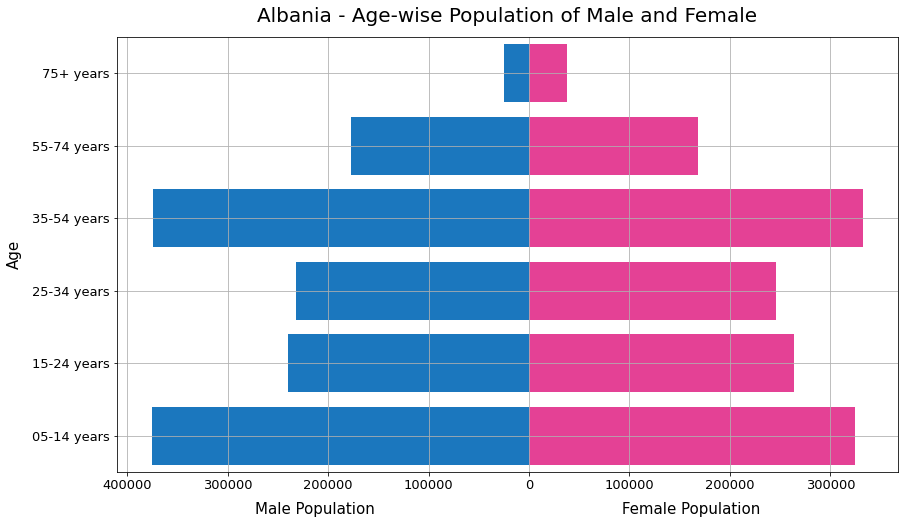


Japan
           age    female      male
0  05-14 years   6090721   6401260
1  15-24 years   7669997   8063415
2  25-34 years   8975013   9260089
3  35-54 years  17380248  17540437
4  55-74 years  15357610  14034032
5    75+ years   5792695   3187143


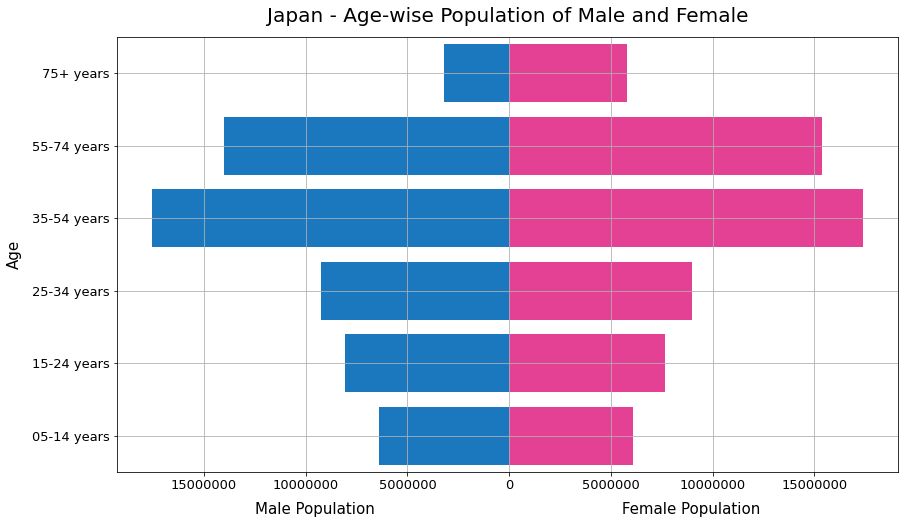


United States
           age    female      male
0  05-14 years  20034103  21043474
1  15-24 years  19105073  20078818
2  25-34 years  19771195  20120529
3  35-54 years  41881451  40945028
4  55-74 years  22717040  19948630
5    75+ years  10494416   6106351


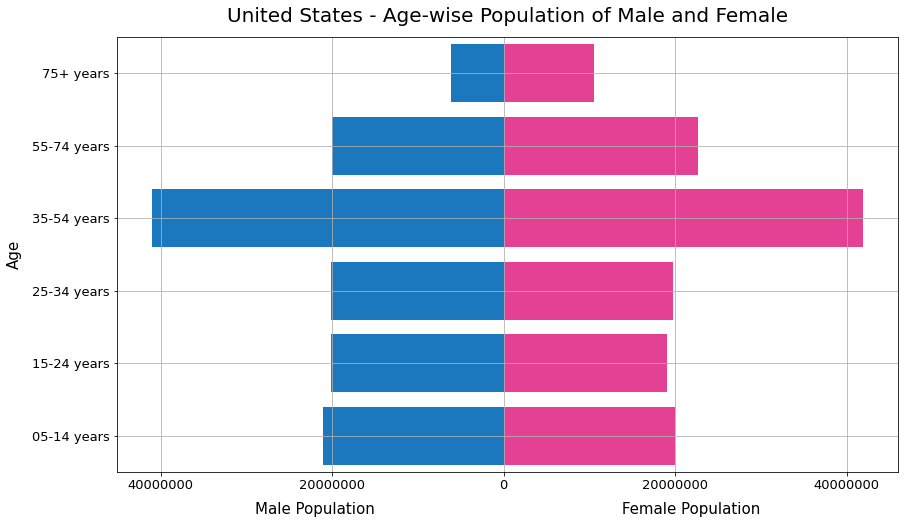


France
           age   female     male
0  05-14 years  3643220  3817540
1  15-24 years  3764091  3885375
2  25-34 years  4188264  4176771
3  35-54 years  8501357  8355079
4  55-74 years  5646919  4982015
5    75+ years  2775754  1531239


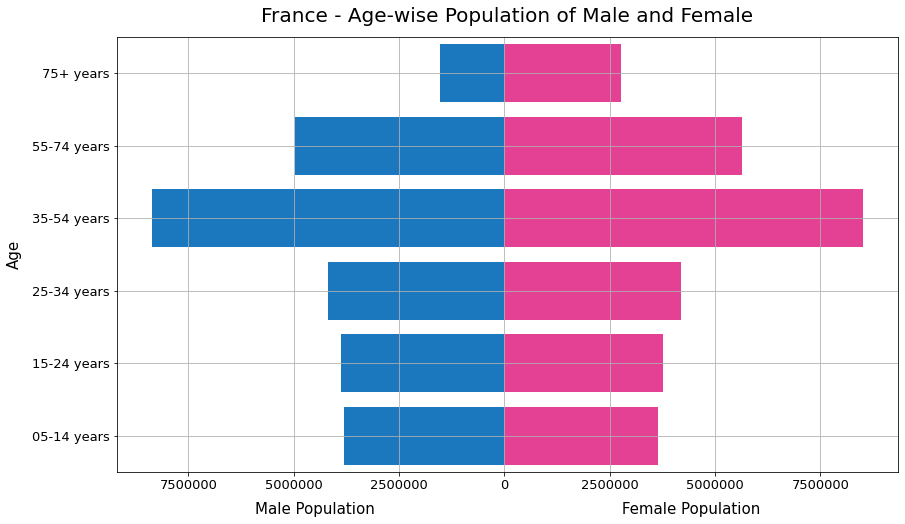


Sweden
           age   female     male
0  05-14 years   570673   601300
1  15-24 years   500737   524457
2  25-34 years   601750   626512
3  35-54 years  1200882  1240681
4  55-74 years   901293   852707
5    75+ years   484818   303198


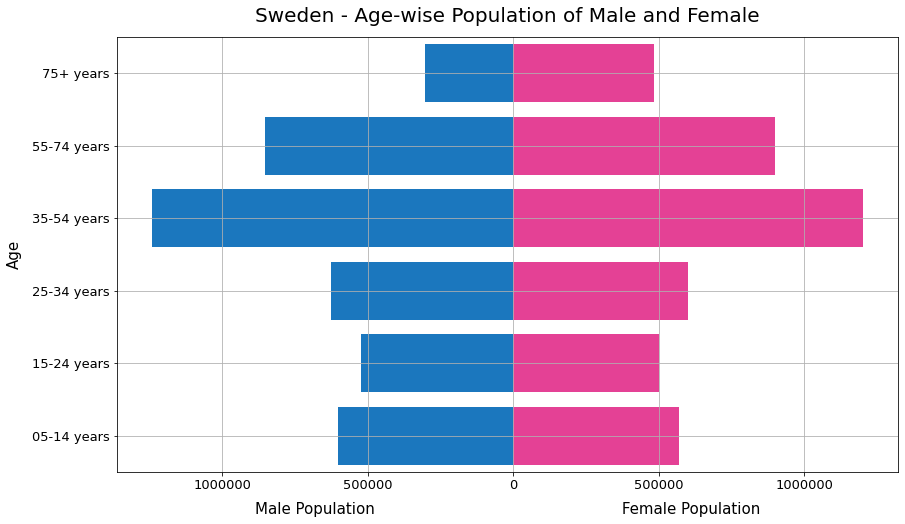

In [57]:
import seaborn as sns

countries = ['Albania', 'Japan', 'United States', 'France', 'Sweden']

age_sex_pop = df[df['year'] == 2000][['country', 'age', 'sex', 'population']]

for i in countries:
  country = age_sex_pop[age_sex_pop['country'] == i].drop(columns='country').pivot(index='age', columns='sex')['population'].reset_index()
  country.columns.name = None
  print(i)
  print(country)
  country['male'] = -country['male']

  fig, ax = plt.subplots(figsize=(14, 8))
  ax = sns.barplot(data=country, x='female', y='age', color='#ff2696', order=country['age'][::-1])
  ax = sns.barplot(data=country, x='male', y='age', color='#007bd9', order=country['age'][::-1])
  ax.ticklabel_format(axis='x', style='plain')
  ax.tick_params(axis='x', labelsize=13, labelrotation=0)
  ax.tick_params(axis='y', labelsize=13)
  ax.set_xlabel('Male Population {} Female Population'.format(' '*50), fontsize=15, labelpad=10, x=0.5)
  ax.set_ylabel('Age', fontsize=15, labelpad=10)
  ax.set_title('{} - Age-wise Population of Male and Female'.format(i), fontsize=20, pad=15)
  ax.grid()
  ax.set_xticklabels([int(abs(tick)) for tick in ax.get_xticks()])

  plt.show()
  print()

                 country  year  HDI for year  suicides/100k pop  population
0                Albania  1995         0.619           3.030929     2903400
1                Albania  2000         0.656           1.931123     2796300
2                Albania  2005         0.695           0.000000     2783320
3                Albania  2010         0.722           3.508740     2736025
4    Antigua and Barbuda  2012         0.781           0.000000       88703
..                   ...   ...           ...                ...         ...
692           Uzbekistan  2010         0.655           5.707206    25651783
693           Uzbekistan  2011         0.661           6.313022    25978049
694           Uzbekistan  2012         0.668           6.955545    26381830
695           Uzbekistan  2013         0.672           7.265567    26838924
696           Uzbekistan  2014         0.675           7.670198    27313507

[697 rows x 5 columns]


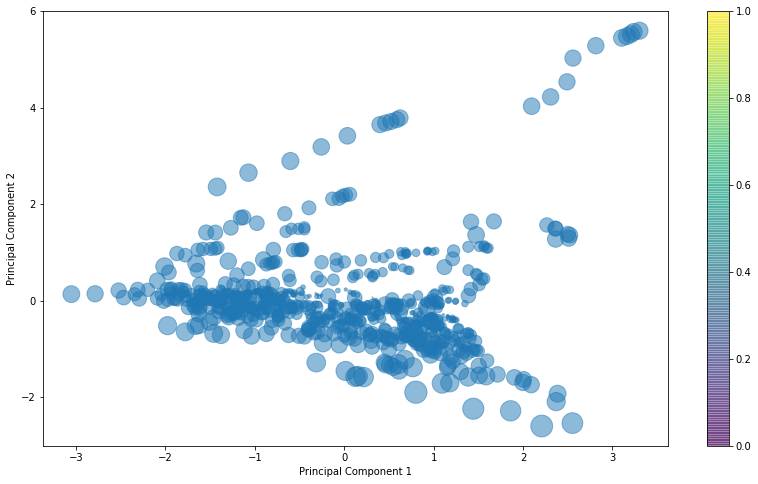

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sui_hdi_pop = df[['country', 'year', 'suicides_no', 'population', 'HDI for year']].groupby(['country', 'year', 'HDI for year'], as_index=False).sum()
sui_hdi_pop['suicides_no'] *= 100000 / sui_hdi_pop['population']
sui_hdi_pop = sui_hdi_pop.rename(columns={'suicides_no': 'suicides/100k pop'})
print(sui_hdi_pop)

standardized = StandardScaler().fit_transform(sui_hdi_pop[['suicides/100k pop', 'population', 'HDI for year']])
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(standardized)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf['principal component 3'] = principalDf['principal component 3'] - principalDf['principal component 3'].min()

fig, ax = plt.subplots(figsize=(14, 8))

shuff = principalDf.sample(frac=1)
X = shuff['principal component 1']
Y = shuff['principal component 2']
Z = shuff['principal component 3']
plt.scatter(X, Y, s=Z*100, alpha=0.5)
plt.colorbar(ax=ax)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()